# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


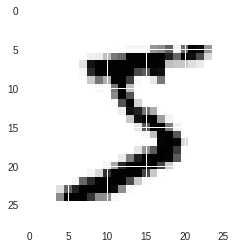

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(3,3,activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 3)         1731      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 10)        40        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.2347 - acc: 0.9268
Epoch 2/10
56672/60000 [===========================>..] - ETA: 1s - loss: 0.0945 - acc: 0.9713

60000/60000 [==============================] - 19s 323us/step - loss: 0.0943 - acc: 0.9715
Epoch 3/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0714 - acc: 0.9781
Epoch 4/10
19040/60000 [========>.....................] - ETA: 13s - loss: 0.0581 - acc: 0.9822

60000/60000 [==============================] - 19s 322us/step - loss: 0.0606 - acc: 0.9818
Epoch 5/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0516 - acc: 0.9837
Epoch 6/10
 7552/60000 [==>...........................] - ETA: 17s - loss: 0.0431 - acc: 0.9870

60000/60000 [==============================] - 19s 321us/step - loss: 0.0461 - acc: 0.9858
Epoch 7/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0417 - acc: 0.9870
Epoch 8/10
 4320/60000 [=>............................] - ETA: 18s - loss: 0.0382 - acc: 0.9896

60000/60000 [==============================] - 19s 321us/step - loss: 0.0368 - acc: 0.9881
Epoch 9/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0334 - acc: 0.9895
Epoch 10/10
 3744/60000 [>.............................] - ETA: 18s - loss: 0.0212 - acc: 0.9925

60000/60000 [==============================] - 19s 321us/step - loss: 0.0324 - acc: 0.9896


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [53]:
print(score)

[0.04955186984038446, 0.9856]


In [0]:
y_pred = model.predict(X_test)

In [35]:
print(y_pred[:9])
print(y_test[:9])

[[1.04603650e-08 1.63928749e-11 4.64974761e-07 6.35568449e-06
  2.59992296e-18 4.35986768e-11 1.59226762e-19 9.99993205e-01
  3.46692008e-10 3.77334120e-09]
 [1.48321067e-06 3.54101602e-03 9.96209145e-01 2.01123754e-07
  6.34449299e-11 3.05617698e-10 2.47869990e-04 4.19328960e-13
  2.74662739e-07 7.20343314e-14]
 [5.99417547e-08 9.99933124e-01 1.68607767e-05 2.36253049e-06
  1.21874400e-05 2.81841722e-06 7.81339168e-06 2.89577315e-06
  2.17578545e-05 9.84748141e-08]
 [9.99995828e-01 3.28959666e-15 1.22960966e-08 1.95560262e-10
  4.15076203e-11 1.02339598e-07 4.05612082e-06 6.23338825e-10
  4.13183820e-10 2.69137601e-08]
 [6.37375521e-08 1.28655365e-12 7.66430297e-09 1.59450821e-07
  9.99741614e-01 9.24252896e-10 6.63283539e-10 1.28499416e-08
  3.63536913e-07 2.57787440e-04]
 [8.15395396e-09 9.99960661e-01 4.17301135e-06 1.71922068e-07
  1.63601253e-05 1.31729493e-07 1.80801365e-07 1.50338146e-05
  3.14920044e-06 1.83627222e-07]
 [3.25979066e-12 5.62300073e-08 7.08053491e-08 2.12534275e

In [36]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_3': <keras.layers.core.Activation at 0x7fd470e010f0>,
 'conv2d_11': <keras.layers.convolutional.Conv2D at 0x7fd470e24630>,
 'conv2d_12': <keras.layers.convolutional.Conv2D at 0x7fd470e247b8>,
 'conv2d_13': <keras.layers.convolutional.Conv2D at 0x7fd470e24f28>,
 'conv2d_14': <keras.layers.convolutional.Conv2D at 0x7fd470e2dcc0>,
 'flatten_3': <keras.layers.core.Flatten at 0x7fd470e5a748>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0x7fd470e245f8>}

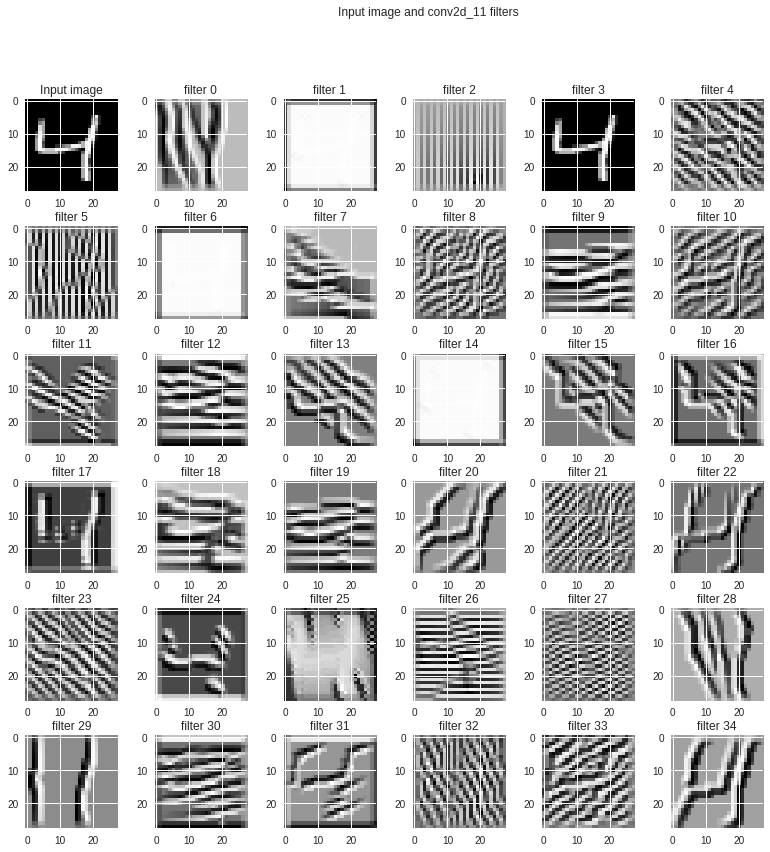

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_11'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()